In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-educational-finances/districts.csv
/kaggle/input/us-educational-finances/main.py
/kaggle/input/us-educational-finances/create_districts_csv.py
/kaggle/input/us-educational-finances/school15doc.pdf
/kaggle/input/us-educational-finances/requirements.txt
/kaggle/input/us-educational-finances/create_states_csv.py
/kaggle/input/us-educational-finances/naep.csv
/kaggle/input/us-educational-finances/states.csv
/kaggle/input/us-educational-finances/create_naep_csv.py
/kaggle/input/us-educational-finances/elsect/elsect/elsec12t.xls
/kaggle/input/us-educational-finances/elsect/elsect/elsec14t.xls
/kaggle/input/us-educational-finances/elsect/elsect/elsec03t.xls
/kaggle/input/us-educational-finances/elsect/elsect/elsec10t.xls
/kaggle/input/us-educational-finances/elsect/elsect/elsec13t.xls
/kaggle/input/us-educational-finances/elsect/elsect/elsec06t.xls
/kaggle/input/us-educational-finances/elsect/elsect/elsec96t.xls
/kaggle/input/us-educational-finances/elsect/elsect/elsec05t.xls

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../input/us-educational-finances/states.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,Alabama,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,Alaska,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,Arizona,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,Arkansas,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,California,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         1275 non-null   object 
 1   YEAR                          1275 non-null   int64  
 2   ENROLL                        1224 non-null   float64
 3   TOTAL_REVENUE                 1275 non-null   int64  
 4   FEDERAL_REVENUE               1275 non-null   int64  
 5   STATE_REVENUE                 1275 non-null   int64  
 6   LOCAL_REVENUE                 1275 non-null   int64  
 7   TOTAL_EXPENDITURE             1275 non-null   int64  
 8   INSTRUCTION_EXPENDITURE       1275 non-null   int64  
 9   SUPPORT_SERVICES_EXPENDITURE  1275 non-null   int64  
 10  OTHER_EXPENDITURE             1224 non-null   float64
 11  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 119.7+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,1275.0,2.004000e+03,7.213932e+00,1992.0,1998.00,2004.0,2010.00,2016.0
ENROLL,1224.0,9.175416e+05,1.066514e+06,43866.0,264514.50,649933.5,1010532.00,6307022.0
TOTAL_REVENUE,1275.0,9.102045e+06,1.175962e+07,465650.0,2189503.50,5085826.0,10845163.00,89217262.0
FEDERAL_REVENUE,1275.0,7.677799e+05,1.146992e+06,31020.0,189957.50,403548.0,827932.00,9990221.0
STATE_REVENUE,1275.0,4.223743e+06,5.549735e+06,0.0,1165776.00,2537754.0,5055547.50,50904567.0
LOCAL_REVENUE,1275.0,4.110522e+06,5.489562e+06,22093.0,715121.00,2058996.0,4755293.00,36105265.0
TOTAL_EXPENDITURE,1275.0,9.206242e+06,1.199279e+07,481665.0,2170404.00,5242672.0,10744201.50,85320133.0
INSTRUCTION_EXPENDITURE,1275.0,4.768010e+06,6.300569e+06,265549.0,1171336.50,2658253.0,5561959.00,43964520.0
SUPPORT_SERVICES_EXPENDITURE,1275.0,2.682587e+06,3.357214e+06,139963.0,638076.00,1525471.0,3222924.50,26058021.0
OTHER_EXPENDITURE,1224.0,4.299509e+05,5.347893e+05,11541.0,103449.25,271704.0,517222.25,3995951.0


In [7]:
df.isnull().sum()

STATE                            0
YEAR                             0
ENROLL                          51
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               51
CAPITAL_OUTLAY_EXPENDITURE       0
dtype: int64

<Axes: >

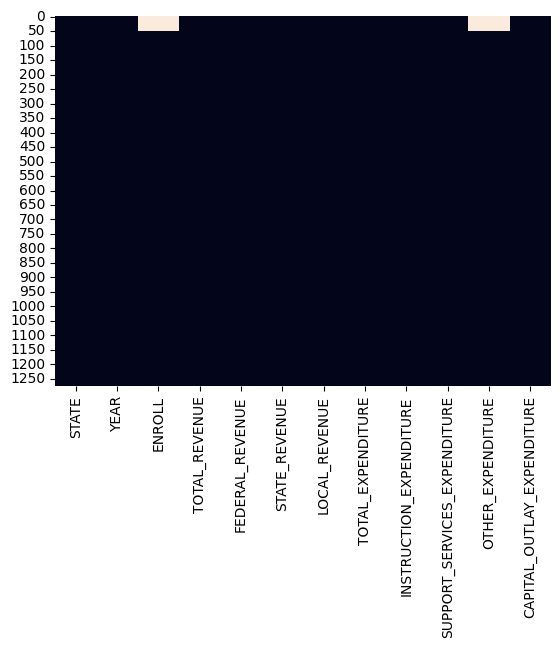

In [8]:
sns.heatmap(df.isnull(), cbar=False)

In [9]:
from sklearn.impute import KNNImputer
imputer=KNNImputer()
x_arr=imputer.fit_transform(df[['ENROLL','OTHER_EXPENDITURE']])
df_=pd.DataFrame(x_arr,columns=imputer.get_feature_names_out())
df.drop(['ENROLL','OTHER_EXPENDITURE'],axis=1,inplace=True)
df=pd.concat([df,df_],axis=1)
df.head()

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,ENROLL,OTHER_EXPENDITURE
0,Alabama,1992,2678885,304177,1659028,715680,2653798,1481703,735036,174053,917541.566176,429950.933824
1,Alaska,1992,1049591,106780,720711,222100,972488,498362,350902,37451,917541.566176,429950.933824
2,Arizona,1992,3258079,297888,1369815,1590376,3401580,1435908,1007732,609114,917541.566176,429950.933824
3,Arkansas,1992,1711959,178571,958785,574603,1743022,964323,483488,145212,917541.566176,429950.933824
4,California,1992,26260025,2072470,16546514,7641041,27138832,14358922,8520926,2044688,917541.566176,429950.933824


<Axes: >

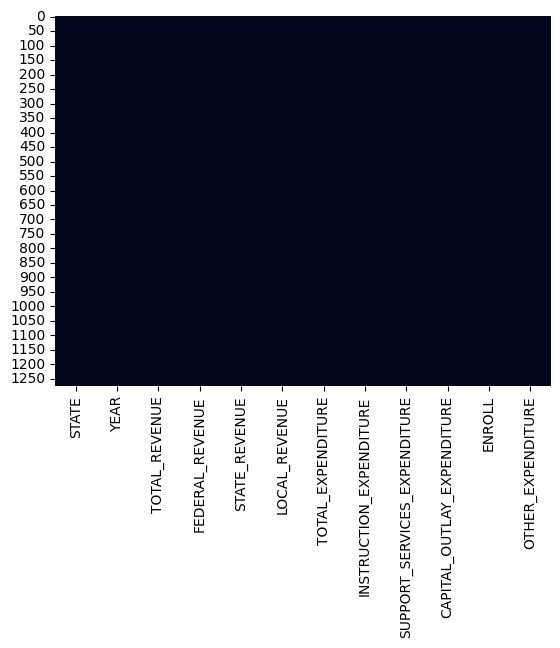

In [10]:
sns.heatmap(df.isnull(), cbar=False)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df['PER_STUDENT_EXPENDITURE'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']

In [13]:
#Calculate the percentage change in key metrics
df['ENROLL_CHANGE'] = df['ENROLL'].pct_change()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


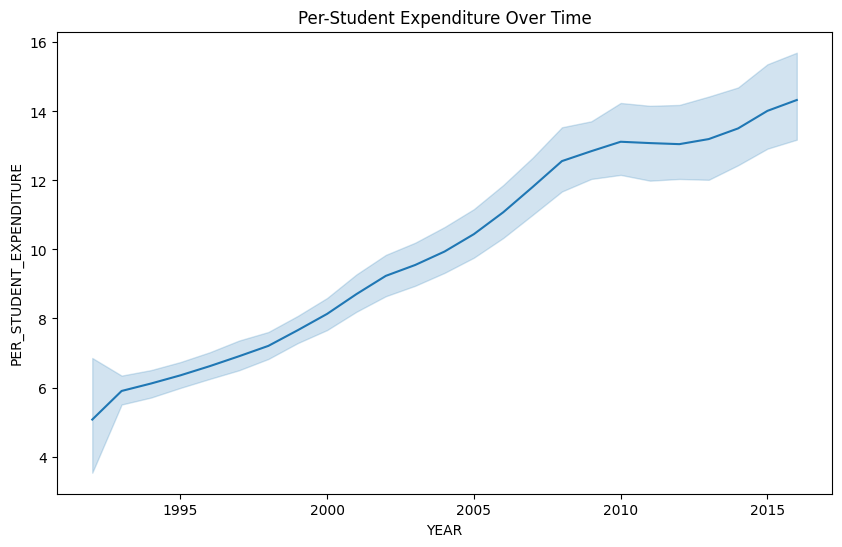

In [14]:
# Plot trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='PER_STUDENT_EXPENDITURE', data=df)
plt.title('Per-Student Expenditure Over Time')
plt.show()

- **Upward Trend:** The most prominent feature is the clear upward trend in per-student expenditure over time. This indicates that, on average, the amount of money spent per student in the given context (likely US public education) has increased consistently from 1995 to 2015.
- **Steady Growth:** The increase appears relatively steady, with no dramatic spikes or drops. The line shows a gradual but consistent rise over the 20-year period.
- **Magnitude of Increase:**  While the exact dollar amount isn't clear without units on the y-axis, we can observe a substantial relative increase.  Expenditures seem to have more than doubled from the starting point in 1995 to the ending point in 2015.
- **Confidence Interval:** The shaded area suggests that there's some uncertainty about the exact values.  The width of the shaded area gives a visual representation of this uncertainty.  It's likely narrower in the earlier and later years, where there might be more data points, and possibly wider in the middle.

In [15]:
# Analyze spending allocation
instruction_percentage = df['INSTRUCTION_EXPENDITURE'].sum() / df['TOTAL_EXPENDITURE'].sum()
print(f"Percentage of spending on instruction: {instruction_percentage}")

Percentage of spending on instruction: 0.5179106112726778


In [16]:
df['STATE'].value_counts()

STATE
Alabama                 25
Pennsylvania            25
Nevada                  25
New Hampshire           25
New Jersey              25
New Mexico              25
New York                25
North Carolina          25
North Dakota            25
Ohio                    25
Oklahoma                25
Oregon                  25
Rhode Island            25
Montana                 25
South Carolina          25
South Dakota            25
Tennessee               25
Texas                   25
Utah                    25
Vermont                 25
Virginia                25
Washington              25
West Virginia           25
Wisconsin               25
Nebraska                25
Missouri                25
Alaska                  25
Idaho                   25
Arizona                 25
Arkansas                25
California              25
Colorado                25
Connecticut             25
Delaware                25
District of Columbia    25
Florida                 25
Georgia               

In [17]:
state_to_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Northeast",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Northeast",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Northeast",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Northeast",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "South",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West"
}

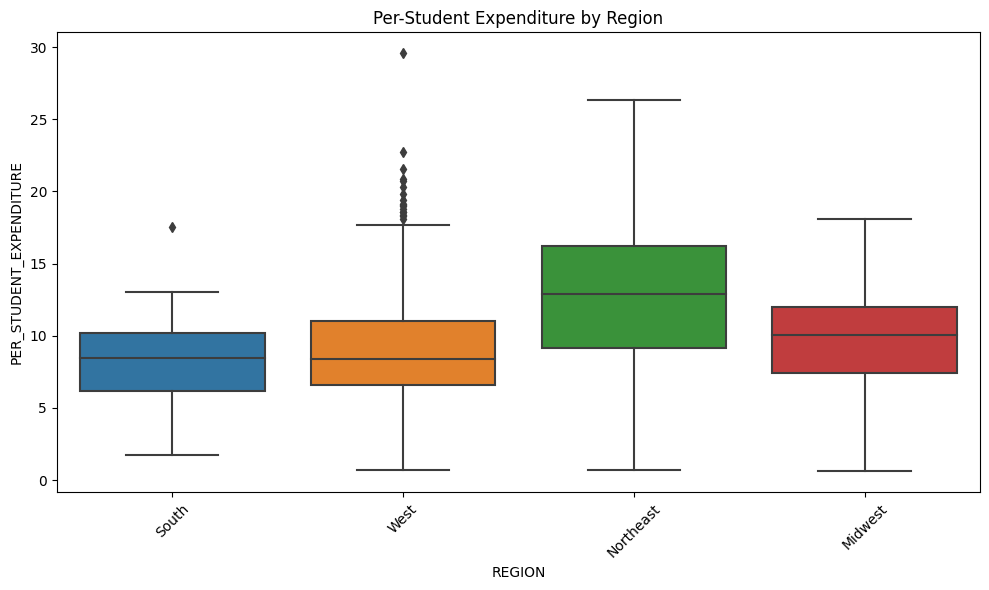

REGION
Midwest       9.730655
Northeast    13.022250
South         8.249498
West          9.068288
Name: PER_STUDENT_EXPENDITURE, dtype: float64


In [18]:
df['REGION'] = df['STATE'].map(state_to_region) 




plt.figure(figsize=(10, 6))
sns.boxplot(x='REGION', y='PER_STUDENT_EXPENDITURE', data=df)
plt.title('Per-Student Expenditure by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(df.groupby('REGION')['PER_STUDENT_EXPENDITURE'].mean())


This report examines per-student expenditure in public education across four regions of the United States: Midwest, Northeast, South, and West. The analysis is based on data that has been processed to calculate per-student expenditure and categorize states into these regions.

- **Northeast Leads in Spending:** The Northeast region exhibits the highest average per-student expenditure, at 13,022.25. This suggests a greater financial investment in education per student compared to other regions.
- **South Has Lowest Spending:** The South region demonstrates the lowest average per-student expenditure, at 8,249.50. This indicates potentially constrained resources allocated to education per student in this region.
- **Midwest and West in Mid-Range:** The Midwest and West regions fall within the mid-range for per-student spending. The Midwest has an average of 9,730.66, while the West has an average of 9,068.29.
- **Significant Regional Disparities:** The difference in per-student spending between the highest-spending (Northeast) and lowest-spending (South) regions is substantial ($4,772.75). This highlights significant financial disparities in educational investment across different regions.
- **Potential Implications:** These spending disparities could potentially lead to variations in educational resources, quality of instruction, and student outcomes across regions. Further investigation is warranted to explore the correlation between per-student expenditure and educational performance metrics.

- **RECOMMENDATIONS**
  - **Resource Allocation Review:** Policymakers and educational stakeholders in lower-spending regions (especially the South) may need to review resource allocation strategies to ensure equitable educational opportunities for all students.
  - **Performance Evaluation:** Evaluate educational performance metrics (e.g., standardized test scores, graduation rates) in conjunction with per-student expenditure to determine the impact of spending on student outcomes.

In [19]:
import statsmodels.formula.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.anova import anova_lm

In [20]:
model = sm.ols('PER_STUDENT_EXPENDITURE ~ C(REGION)', data=df).fit()
anova_table = anova_lm(model, typ=2)  # Use anova_lm directly
print("ANOVA Results:\n", anova_table)


ANOVA Results:
                  sum_sq      df          F        PR(>F)
C(REGION)   3866.406047     3.0  99.274199  1.275420e-57
Residual   16175.877745  1246.0        NaN           NaN


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


- **Highly Significant Difference:** The p-value **(PR(>F))** for C(REGION) is extremely small (1.275420e-57, which is essentially 0 for practical purposes).  This means there is a highly statistically significant difference in per-student expenditure between at least two of the regions.  It's extremely unlikely that these differences are due to random chance.
- **Large F-statistic:** The F-statistic (99.274199) is very large, which further supports the conclusion of significant differences between region means.
- **Sum of Squares:** The sum of squares for C(REGION) (3866.406047) being larger than the residual sum of squares (16175.877745) indicates that a substantial portion of the total variability in per-student expenditure is explained by the region differences.

that indicates a very strong and statistically significant difference in per-student expenditure between the regions. 

Funding Source Breakdown by Region:
            FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE       TOTAL
REGION                                                              
Midwest           7.463029      46.116689      46.420282  2629058380
Northeast         5.843496      39.954687      54.201818  3043842000
South            10.331151      46.184442      43.484408  3410257372
West              9.997483      55.345906      34.656611  2496429768


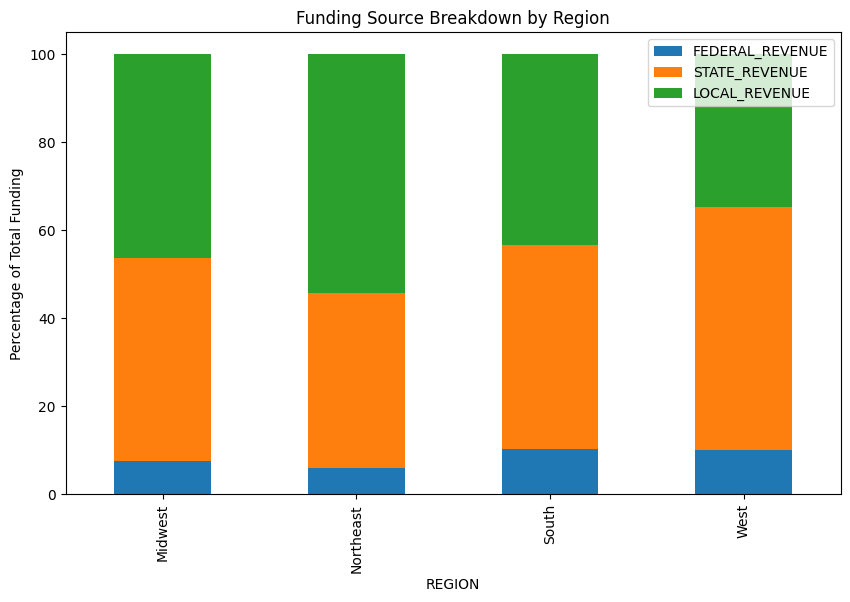

In [21]:
# Calculate the percentage of funding from each source for each region
funding_by_region = df.groupby('REGION')[['FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE']].sum()
funding_by_region['TOTAL'] = funding_by_region.sum(axis=1)  # Calculate total revenue for percentages
for col in ['FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE']:
    funding_by_region[col] = (funding_by_region[col] / funding_by_region['TOTAL']) * 100

print("Funding Source Breakdown by Region:\n", funding_by_region)

# Plotting (example - stacked bar chart)
funding_by_region[['FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Funding Source Breakdown by Region')
plt.ylabel('Percentage of Total Funding')
plt.show()

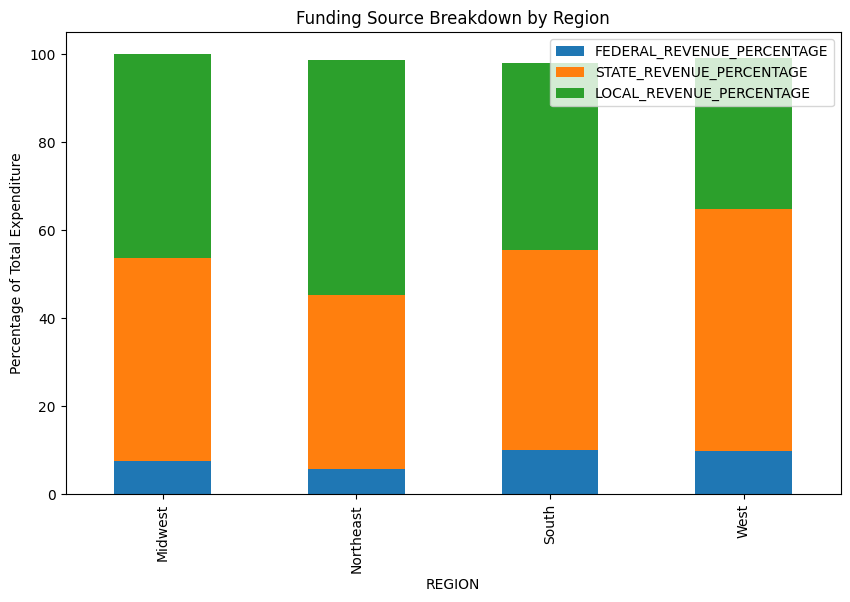

           FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
REGION                                                                        
Midwest          196207401     1212434676     1220416303         2629668326   
Northeast        177866771     1216157534     1649817695         3083781618   
South            352318831     1575008323     1482930218         3478331090   
West             249580147     1381671668      865177953         2520748475   

           FEDERAL_REVENUE_PERCENTAGE  STATE_REVENUE_PERCENTAGE  \
REGION                                                            
Midwest                      7.461298                 46.105992   
Northeast                    5.767813                 39.437213   
South                       10.128962                 45.280575   
West                         9.901033                 54.811961   

           LOCAL_REVENUE_PERCENTAGE  
REGION                               
Midwest                   46.409514  
Northeas

In [22]:
regional_funding = df.groupby('REGION')[['FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE']].sum()


for source in ['FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE']:
    regional_funding[source + '_PERCENTAGE'] = (regional_funding[source] / regional_funding['TOTAL_EXPENDITURE']) * 100


regional_funding[['FEDERAL_REVENUE_PERCENTAGE', 'STATE_REVENUE_PERCENTAGE', 'LOCAL_REVENUE_PERCENTAGE']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Funding Source Breakdown by Region')
plt.ylabel('Percentage of Total Expenditure')
plt.show()

print(regional_funding)

- **Regional Variation in Funding Balance:**

   - **West:** The West region shows the highest reliance on Local funding and the lowest reliance on State funding among the four. This suggests a greater role of property taxes or other local revenue sources in funding education in the West.
   - **Northeast:** The Northeast region exhibits a relatively balanced distribution between State and Local funding, although Local funding still predominates.
   - **Midwest and South:** The Midwest and South regions demonstrate a more significant reliance on State funding compared to the West and Northeast.

- **Federal Contribution is Minor but Consistent:**  Federal funding plays a relatively minor role in financing public education across all regions. The federal share is consistently the smallest segment in each bar, indicating its supplementary role.

- **Potential Implications for Equity:**

   - **Local Funding Disparities:** The heavy reliance on local funding, particularly in the West, could lead to disparities in per-student spending within states. Districts with higher property values can generate more local revenue, potentially resulting in wealthier districts having better-funded schools.
   - **State Role in Equalization:** State funding plays a crucial role in mitigating disparities caused by variations in local wealth. The greater reliance on state funding in the Midwest and South may reflect efforts to equalize funding across districts within those regions.

- **Federal Role in Targeted Support:**  While the overall federal contribution is small, federal funding often targets specific needs or student populations (e.g., low-income students, special education). Its impact might be more significant in specific areas or programs.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop('ENROLL', axis=1) 
y = df['ENROLL']


numerical_features = ['FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE']  # Add other numerical features
categorical_features = ['REGION']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test size as needed

In [24]:
# Linear Regression Model
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

# Random Forest Regressor Model
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))])  # Add hyperparameters if needed

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared: {r2}")
    return mse, r2

# Evaluate models
mse_lr, r2_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression - Mean Squared Error: 104340051496.2442
Linear Regression - R-squared: 0.9110390167606368
Random Forest - Mean Squared Error: 41512915048.3761
Random Forest - R-squared: 0.9646058278975583


**summary:** The Random Forest model provides better predictions of enrollment than Linear Regression.  While both models show a good fit based on R-squared, the high MSE values suggest that there are likely other factors influencing enrollment that are not being captured by the current model.  Further investigation, including feature importance analysis and addressing the high MSE, is necessary.


Feature Importances (Random Forest):
                               Feature  Importance
6              num__OTHER_EXPENDITURE    0.534108
7     num__CAPITAL_OUTLAY_EXPENDITURE    0.225640
1                  num__STATE_REVENUE    0.083499
5   num__SUPPORT_SERVICES_EXPENDITURE    0.079137
3              num__TOTAL_EXPENDITURE    0.043371
4        num__INSTRUCTION_EXPENDITURE    0.014821
0                num__FEDERAL_REVENUE    0.006689
2                  num__LOCAL_REVENUE    0.004715
11                   cat__REGION_West    0.003238
10                  cat__REGION_South    0.002513
8                 cat__REGION_Midwest    0.001353
9               cat__REGION_Northeast    0.000894
12                    cat__REGION_nan    0.000022


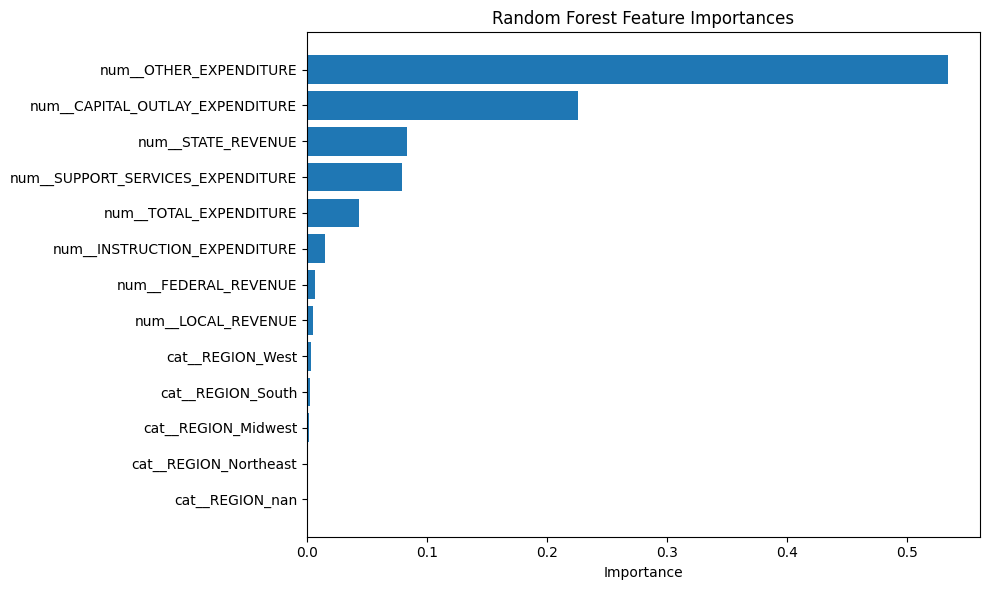

In [25]:
# Get feature importances (after fitting the Random Forest model)
feature_importances = pipeline_rf.named_steps['regressor'].feature_importances_


feature_names = pipeline_rf.named_steps['preprocessor'].get_feature_names_out()


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Random Forest):\n", importance_df)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # Invert to show most important at the top
plt.tight_layout()
plt.show()

- **Dominant Influence of OTHER_EXPENDITURE:** 
`OTHER_EXPENDITURE` has by far the highest importance.  This suggests that expenditures categorized as "other" (which could include various administrative, operational, or miscellaneous spending) are the strongest predictor of enrollment.
- **Significant Role of CAPITAL_OUTLAY_EXPENDITURE:**
  `CAPITAL_OUTLAY_EXPENDITURE` (spending on infrastructure, buildings, etc.) also plays a substantial role in predicting enrollment.  This makes intuitive sense, as investments in facilities can influence student capacity and attractiveness of schools.

- **Moderate Influence of STATE_REVENUE and SUPPORT_SERVICES_EXPENDITURE:** `STATE_REVENUE` and `SUPPORT_SERVICES_EXPENDITURE` have a moderate impact.  State funding and spending on support services (administration, counseling, etc.) are relevant, but less influential than the top two.
- **Lower Influence of Other Factors:** The remaining features, including instruction expenditure, federal and local revenue, and region, have relatively low importance in comparison.  While they still contribute to the model's predictive power, their influence is less pronounced.

**Overall Conclusions and Recommendations**

1. **Focus on Expenditure Analysis:** The strong influence of expenditures, particularly `OTHER_EXPENDITURE` and `CAPITAL_OUTLAY_EXPENDITURE`, suggests that a detailed breakdown and analysis of spending patterns are crucial to understanding enrollment trends.  InvestInMind could focus on research that examines:
   
   - What constitutes "OTHER_EXPENDITURE" and how it varies across districts or states.
   - The relationship between capital investments and enrollment growth or decline.


2. **Consider Non-Financial Factors:** While funding sources and expenditures are important, the relatively low importance of "REGION" suggests that other non-financial factors might be at play.  InvestInMind should consider exploring:

   - Demographic changes (population growth, migration patterns).
   - School quality and reputation (test scores, graduation rates, program offerings).
   - Parental choice and school choice programs.
   - Economic conditions and employment opportunities.
3. **Address Data Limitations:** The high MSE values in the machine learning models, despite high R-squared, suggest that there might be data limitations.  InvestInMind could advocate for:

   - Improved data collection and reporting on educational finances.
   - Standardized definitions and categorization of expenditures (especially "OTHER_EXPENDITURE").
   - More granular data (e.g., at the district or school level).
4. **Targeted Support for Underserved Areas:** Given the potential disparities in local funding, InvestInMind could focus its support on:

   - Districts with low LOCAL_REVENUE or high poverty rates.
   - Areas where capital investments are needed to improve facilities and accommodate enrollment growth.
5. **Policy Advocacy: Based on the research and analysis, InvestInMind can advocate for:**

   - More equitable funding formulas at the state and local levels.
   - Policies that promote efficient and effective use of educational resources.
   - Increased transparency and accountability in educational spending.
6. **Further Research:**  Conduct further research to:

   -Explore the causal relationships between expenditures and enrollment (using more advanced statistical techniques).
   - Investigate the impact of specific programs or interventions on enrollment and student outcomes.